Daily homework for Tuesday
Here I'm creating 20 data sets (samples), each containing 30 observations, from a bernoulli model with p = 0.8.
 
```
list_of_bernoulli_samples = []
for i in range(20):
    list_of_bernoulli_samples.append( bernoulli.rvs(size=30,p=.8) )
```
So this is a list of lists-- every item in this list is 30 samples from a bernoulli.
 
Write code to use this data
A. Calculate the likelihood for the first sample under 4 different Bernoulli models: p = .2, p=.4, p=.6, p=.8 (remember, likelihood is sum of the logs of the probabilities of each of hte observations). Describe the likelihood results. Is it what you expect? Which is the most likely model?
 
B. For each of the 4 different models, calculate the likelihood for all 20 samlpes, and make a histogram of the distribution of the likelihoods  (4 separate histograms is ok, nothing fancy) Explain/interpret the results. What is different? Which model is most likely and how ccan you see that in the histograms?

In [8]:
from scipy.stats import bernoulli
list_of_bernoulli_samples = []
for i in range(20):
    list_of_bernoulli_samples.append( bernoulli.rvs(size=30,p=.8) )

print(list_of_bernoulli_samples)

[array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1]), array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1]), array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1]), array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1]), array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1]), array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0]), array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

# Part A
These likelihood results are what I would expect. As we approach the probability used to generate the datasets above, the likelihood (-log) approaches 0, where 0 would be an exact match of the model that we have.

Maximum likelihood: 0.8


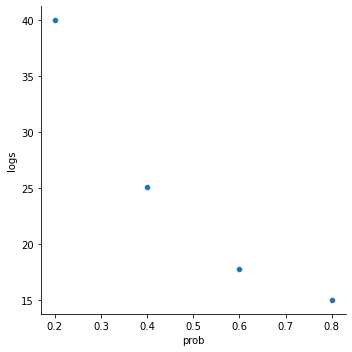

In [9]:
# Part A
import numpy as np
import pandas as pd
import seaborn as sns
bins = np.linspace(0.2, 0.8, 4)
logs = []

# For each probability
for prob in bins:
    # Take the log of the probability that each observation in our dataset would be observed
    # With the given probability
    prob_logs = np.log(bernoulli.pmf(list_of_bernoulli_samples[0], p=prob))
    # Take the sum of all of the log(prob) measurements and multiply by -1
    logs.append(prob_logs.sum() * -1)

# Create a dataframe with the probability in 1 column and the negative log in another
logs_df = pd.DataFrame({'prob':bins, 'logs':logs})

# Plot the logs vs prob data and determine the probability with the maximum likelihood of explaining the real data
sns.relplot(data=logs_df, x='prob', y='logs')

print('Maximum likelihood:', logs_df.loc[logs_df['logs'].idxmin(), 'prob'])

# Part B

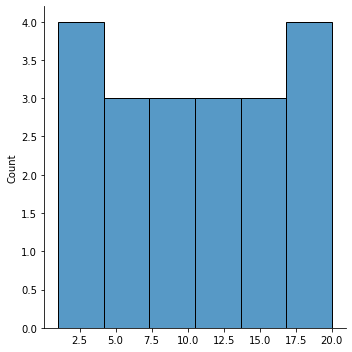

In [17]:
# Part B
bins = np.linspace(0.2, 0.8, 4)
logs = []
df = pd.DataFrame(columns=range(21))

# For each probability
for prob in bins:
    # For each sample
    for sample in list_of_bernoulli_samples:
        # Take the log of the probability that each observation in our dataset would be observed
        # With the given probability
        prob_logs = np.log(bernoulli.pmf(list_of_bernoulli_samples[0], p=prob))
        # Take the sum of all of the log(prob) measurements and multiply by -1
        logs.append(prob_logs.sum() * -1)
    # Add a new row to the dataframe with all of these observations
    df.loc[len(df.index)] = [prob] + logs
    # Reset logs to an empty list for the next prob
    logs = []

# Adjusting so each row is a sample and the columns are the probability model
prob_df = df.transpose()
prob_df.columns = prob_df.iloc[0]
prob_df = prob_df[1:]
# Plot the logs vs prob data and determine the probability with the maximum likelihood of explaining the real data
sns.displot(data=prob_df, x=prob_df.index)